>## MoonLight Energy Solutions for benin

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

>>### load Benin-malanville.

In [56]:
data = pd.read_csv("../data/benin-malanville.csv")

>>### verify loaded data

In [55]:
data.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
5,2021-08-09 00:06,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.8,0.0,0.4,0.1,119.1,0.0,997,0,0.0,26.4,26.3,NaN
6,2021-08-09 00:07,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.0,0.0,0.0,0.0,0.0,997,0,0.0,26.5,26.3,NaN
7,2021-08-09 00:08,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.7,0.7,1.3,0.6,126.8,2.8,997,0,0.0,26.5,26.3,NaN
8,2021-08-09 00:09,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.4,1.1,0.5,124.9,5.5,997,0,0.0,26.5,26.4,NaN
9,2021-08-09 00:10,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.6,0.5,1.1,0.5,114.2,5.1,997,0,0.0,26.5,26.4,NaN


>>#### provides a quick overview of a DataFrame

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

>>#### Summary statistics help us understand the distribution and central tendencies of the data.

In [53]:

data.drop(columns='Comments').describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


>>### mising value

In [52]:
missing_values = data.isnull().sum()


In [51]:
missing_values.all

<bound method Series.all of Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64>

>>### detect outlier


In [58]:
def detectOutliers(data):
    outlier = {}
    for column in data.columns:
        if data[column].dtype in ['float64', 'int64']:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)

            IQR = Q3 - Q1

            lowerBound = Q1-1.5*IQR
            upperBound = Q3+1.5*IQR

            outlierCondition = (data[column] < lowerBound) | (data[column] > upperBound)
            outlier[column] = data[column][outlierCondition].values
    return outlier

outliers = detectOutliers(data)

>>## graph

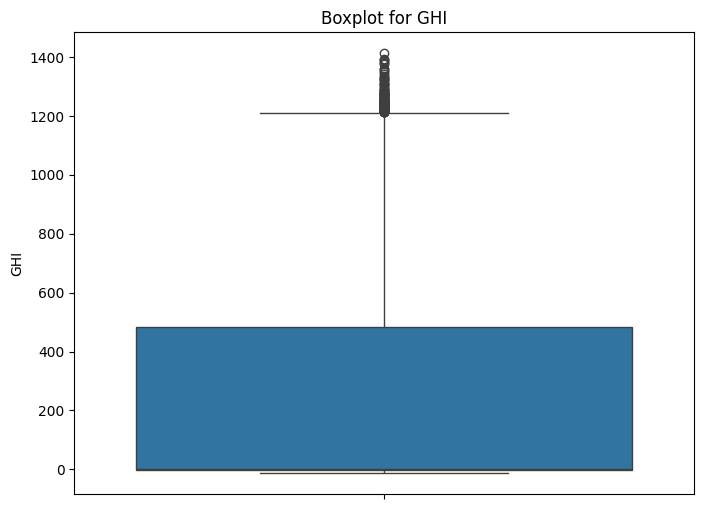

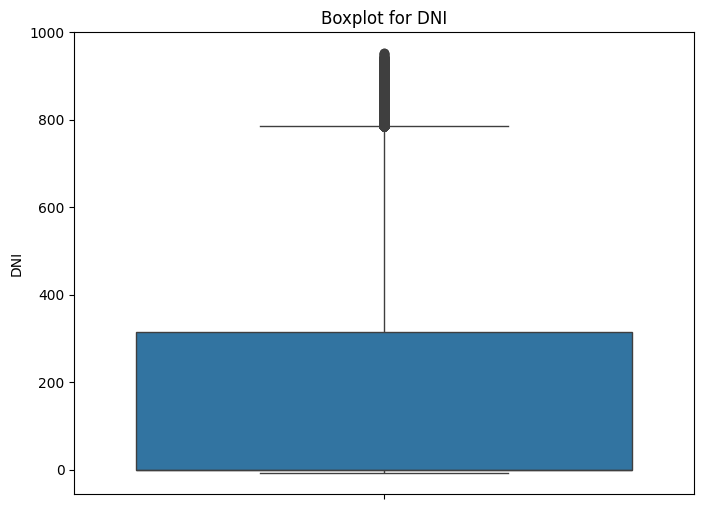

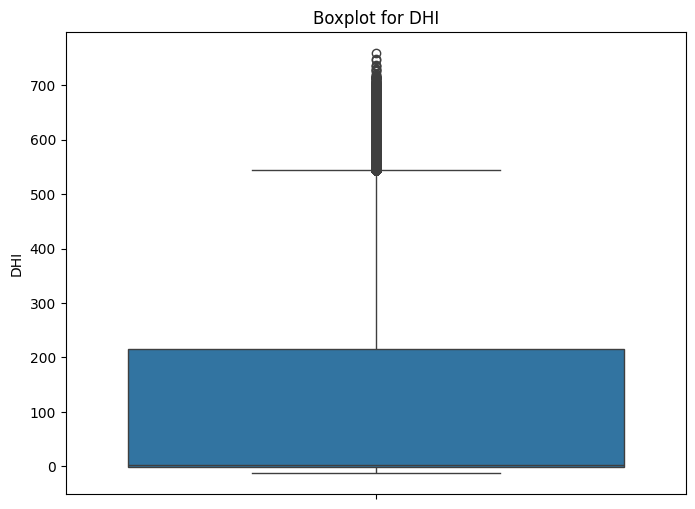

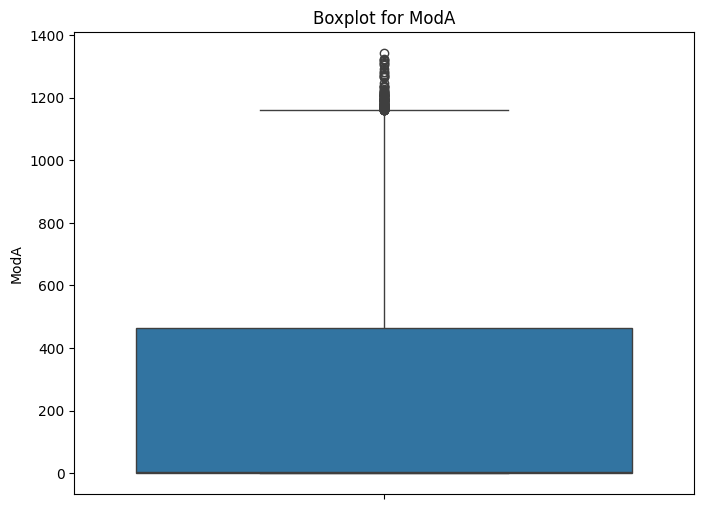

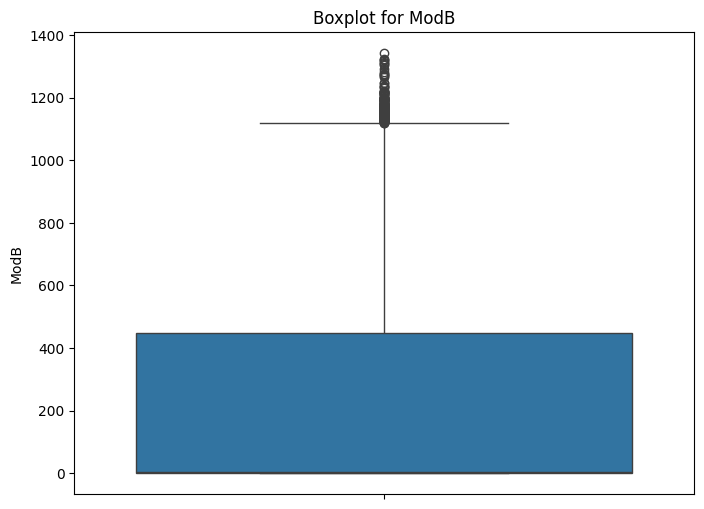

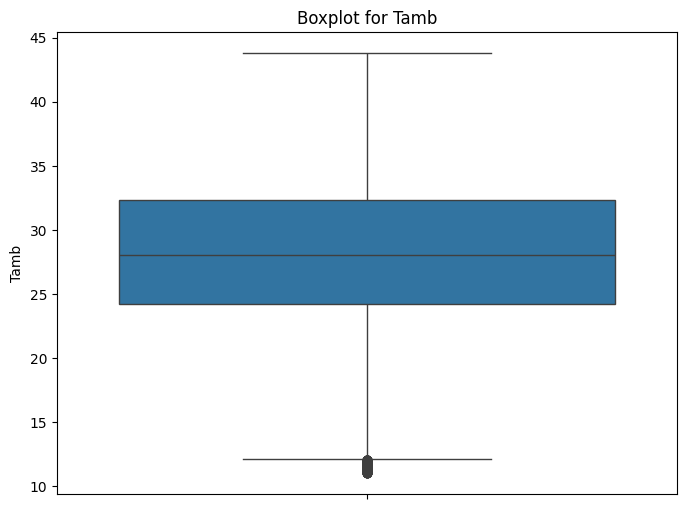

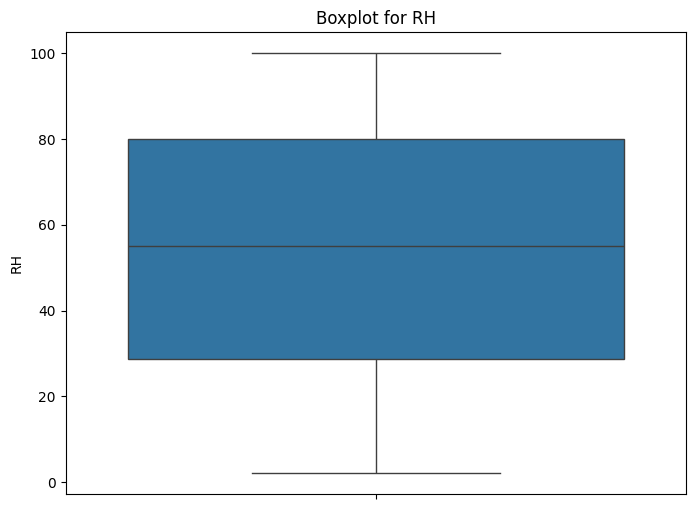

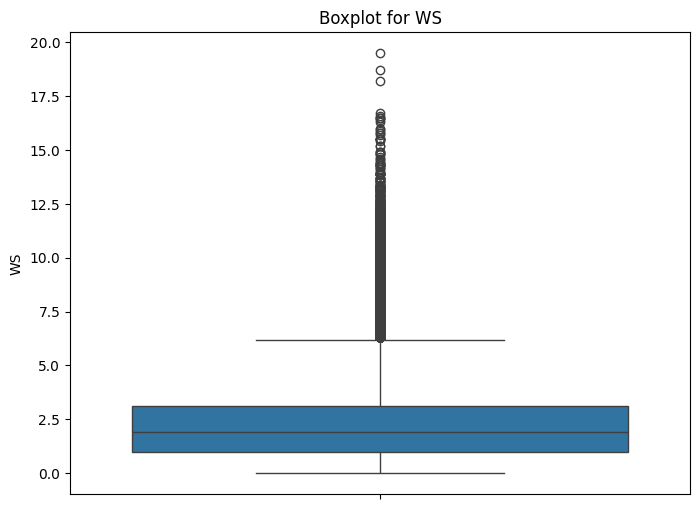

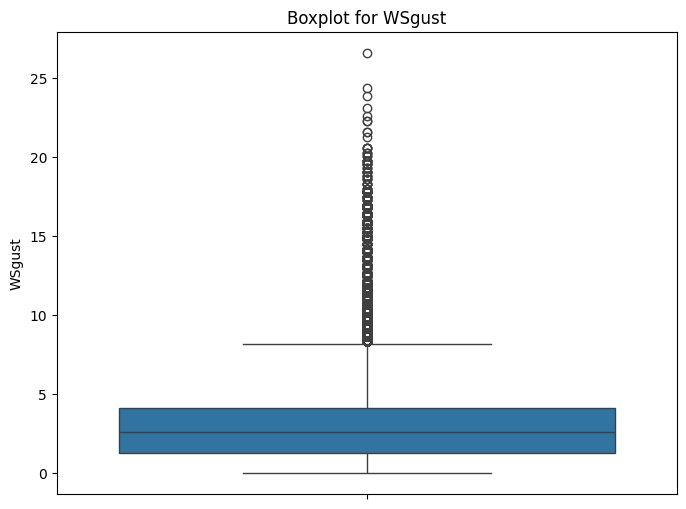

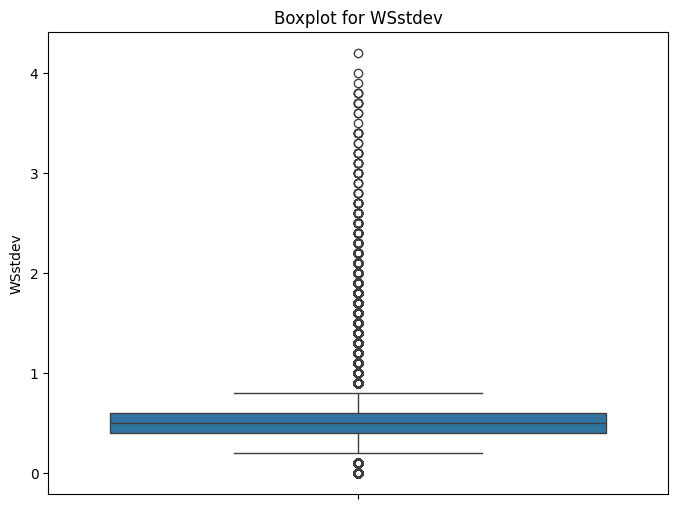

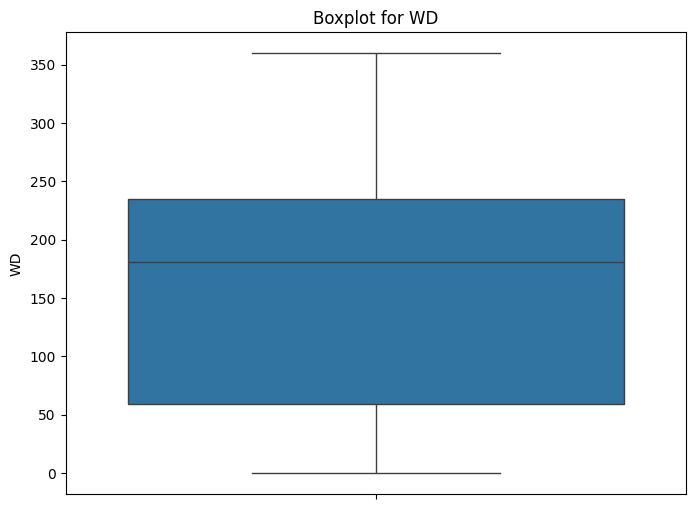

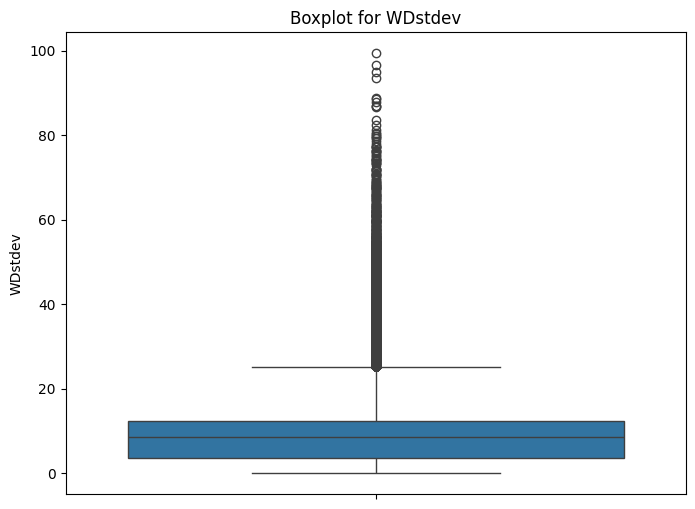

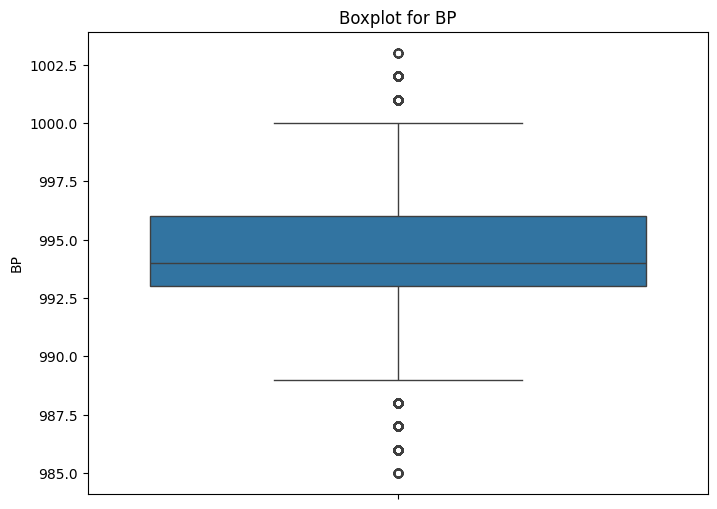

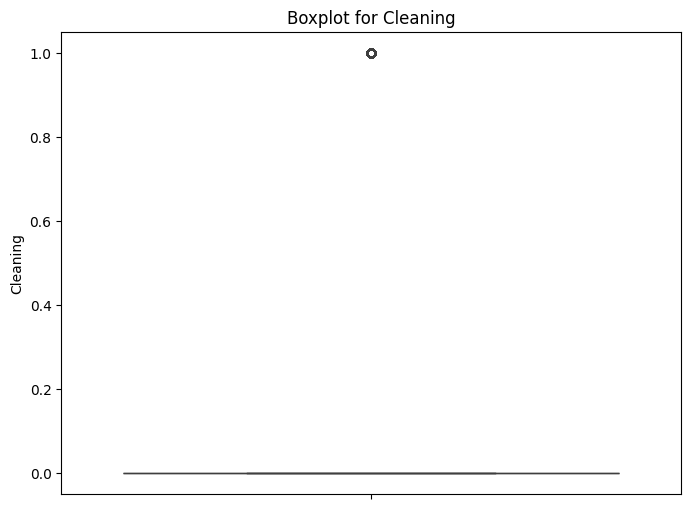

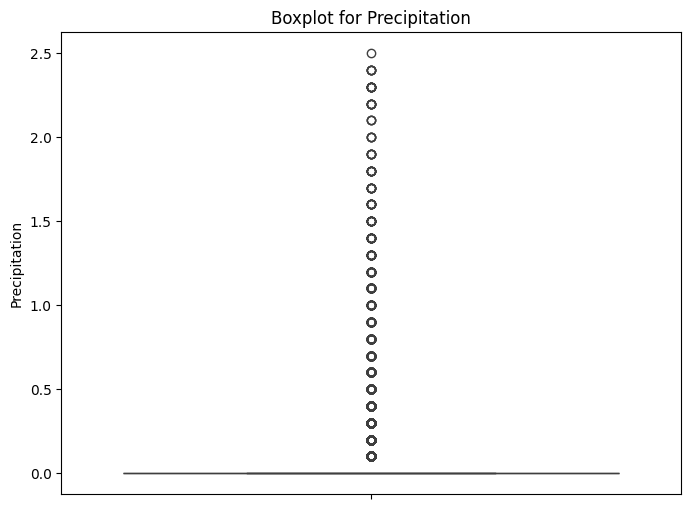

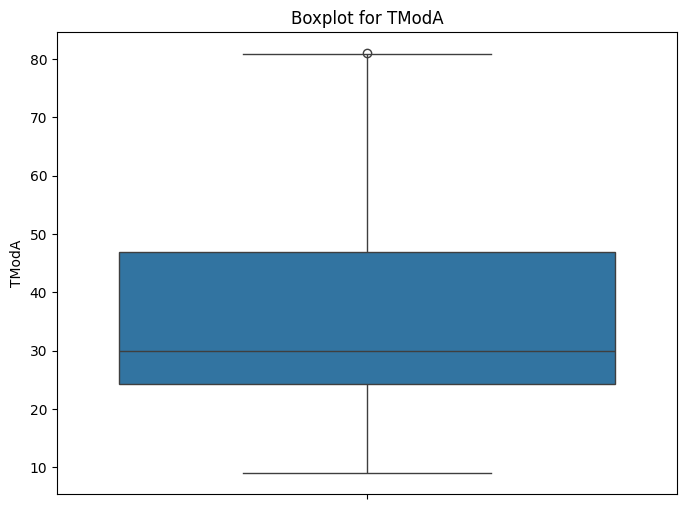

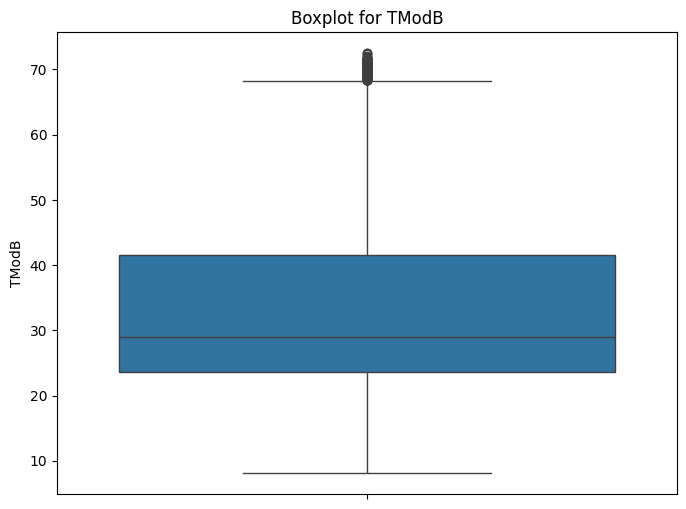

<Figure size 800x600 with 0 Axes>

In [59]:
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):  # Check if column is numeric
        plt.figure(figsize=(8, 6))
        
        # Drop missing values for the column
        column_data = data[column].dropna()
        
        if not column_data.empty:  # Ensure there's data to plot
        
            sns.boxplot(y=column_data)
            plt.title(f"Boxplot for {column}")

        if column in outliers:
            plt.show()
        else:
            print(f"Skipping column {column}: No data to plot after handling NaNs.")

>>> ##### Columns that must be positive:
GHI, DNI, DHI, ModA, ModB, WS, WSgust, WSstdev, BP, Precipitation


>> ##### checking incorrect entries (e.g., negative values where only positive should exist),

In [60]:
positive_columns = ['GHI', 'DNI', 'DHI']

incorrect_entries = data[positive_columns][data[positive_columns] < 0]

print(incorrect_entries)

        GHI  DNI  DHI
0      -1.2 -0.2 -1.1
1      -1.1 -0.2 -1.1
2      -1.1 -0.2 -1.1
3      -1.1 -0.1 -1.0
4      -1.0 -0.1 -1.0
...     ...  ...  ...
525595 -5.5 -0.1 -5.9
525596 -5.5 -0.1 -5.8
525597 -5.5 -0.1 -5.8
525598 -5.5 -0.1 -5.8
525599 -5.5 -0.1 -5.7

[525600 rows x 3 columns]


>> ## Time Series Analysis:

>> ## Time Series Analysis:

In [61]:
# Convert 'Timestamp' column to datetime object
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Add columns for month and hour for analysis
data['Month'] = data['Timestamp'].dt.month
data['Hour'] = data['Timestamp'].dt.hour

>>>> #### plot by monthly trend 

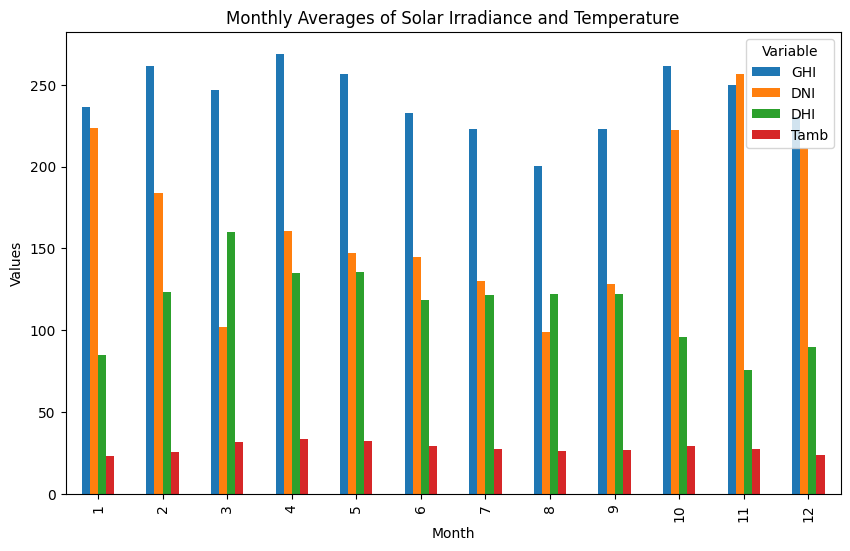

In [62]:
# Group by month and calculate the mean
monthly_data = data.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot monthly trends
monthly_data.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Averages of Solar Irradiance and Temperature')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend(title='Variable')
plt.show()


>>> #### plot daily trends

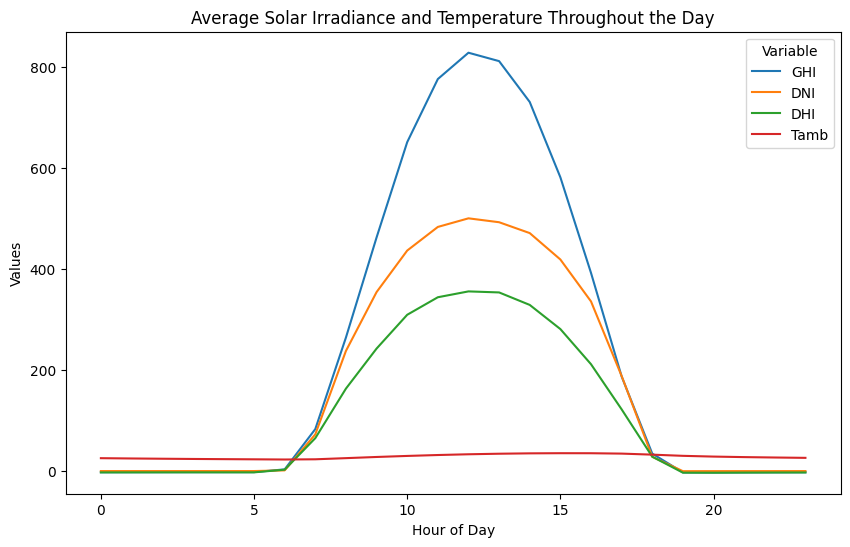

In [63]:
# Group by hour and calculate the mean
hourly_data = data.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot daily trends
hourly_data.plot(kind='line', figsize=(10, 6))
plt.title('Average Solar Irradiance and Temperature Throughout the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Values')
plt.legend(title='Variable')
plt.show()


>>> #### Compare Sensor Readings Before and After Cleaning

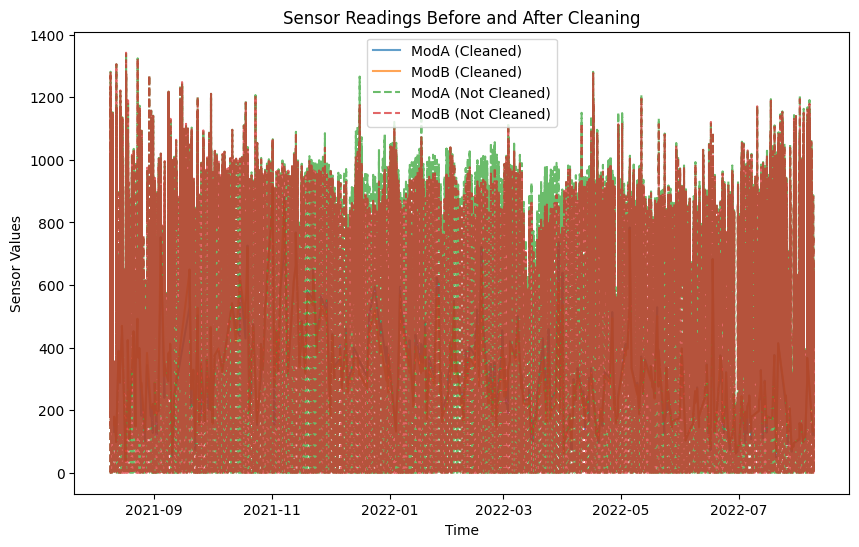

In [64]:
# Separate data into cleaned and uncleaned periods
cleaned = data[data['Cleaning'] == 1]
not_cleaned = data[data['Cleaning'] == 0]

# Plot sensor readings
plt.figure(figsize=(10, 6))
plt.plot(cleaned['Timestamp'], cleaned['ModA'], label='ModA (Cleaned)', alpha=0.7)
plt.plot(cleaned['Timestamp'], cleaned['ModB'], label='ModB (Cleaned)', alpha=0.7)
plt.plot(not_cleaned['Timestamp'], not_cleaned['ModA'], label='ModA (Not Cleaned)', linestyle='--', alpha=0.7)
plt.plot(not_cleaned['Timestamp'], not_cleaned['ModB'], label='ModB (Not Cleaned)', linestyle='--', alpha=0.7)
plt.title('Sensor Readings Before and After Cleaning')
plt.xlabel('Time')
plt.ylabel('Sensor Values')
plt.legend()
plt.show()

>>> #### Highlight Anomalies

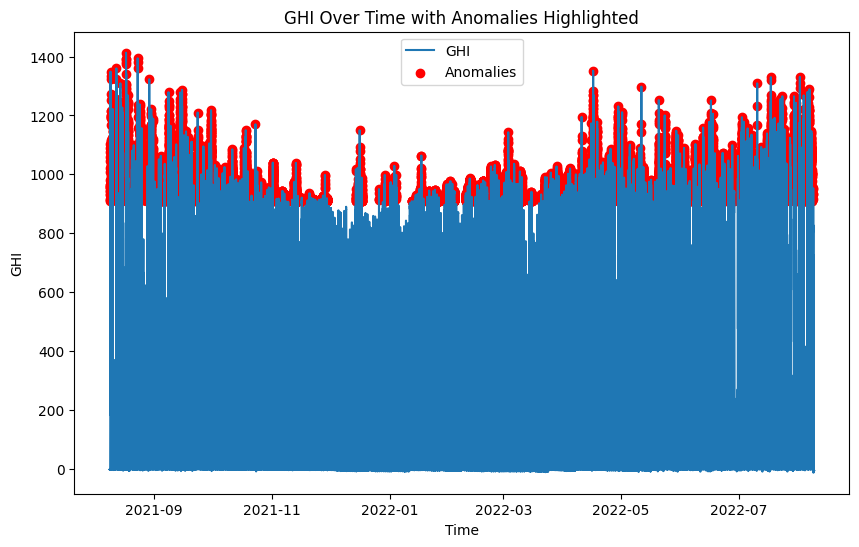

In [65]:
# Identify anomalies (e.g., values above 95th percentile)
ghi_threshold = data['GHI'].quantile(0.95)
anomalies = data[data['GHI'] > ghi_threshold]

# Plot anomalies
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['GHI'], label='GHI')
plt.scatter(anomalies['Timestamp'], anomalies['GHI'], color='red', label='Anomalies')
plt.title('GHI Over Time with Anomalies Highlighted')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.legend()
plt.show()
